## Méthodes numériques pour la résolution d'une équation différentielle ordinaire

Ce python notebook est inspiré de celui de **Julien Guillod**, [Sorbonne Université](http://www.sorbonne-universite.fr/),
Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a> et du cours de physique très complet proposé sur https://femto-physique.fr/omp/euler.php .  

### Objectifs
On peut envisager de ne pas recourir aux ***librairies numérique*** pour réaliser la résolution d'une équation différentielle. Le but ici est de (re)découvrir pour résoudre une équation différentielle ordinaire (EDO) d'ordre 1. À noter que les équations différentielles ordinaires d'ordre supérieur, peuvent être mises sous la forme précédente du premier ordre.

La cinétique chimique n'est ici qu'un prétexte pour vous faire travailler deux méthodes simples (qui d'ailleurs trouvent leur limites en cinétique, dans le cadre des *problèmes raides*, lorsque les constantes de vitesse diffèrent de plusieurs ordres de grandeur).

**Méthodes abordées**

* méthodes d'Euler

* méthodes de Runge-Kutta

### 1. Méthode d'Euler

On cherche donc une solution approchée d'une équation différentielle ordinaire du premier ordre se mettant sous la forme:

\begin{align} y'(t) & = f(t,y(t)) \qquad 0\leq t \leq T \\
y(0) & = y_0 
\end{align}

où $y(t)$ est un scalaire ou un vecteur et $f(t,y(t))$ une fonction suffisamment régulière pour que l'existence et l'unicité de la solution ne pose pas de problème.

Les deux méthodes numériques évoquées ici pour résoudre les équations différentielles sont des méthodes approximatives basées sur la ***discrétisation*** de la variable temps $t$. Le problème se ramène alors à un calcul ***itératif***, facile à programmer.

Pour effectuer le calcul numérique, l'utilisateur doit disposer:

* de la durée $T$ de la simulation numérique;

* des conditions initiales et de la fonction $f$;

* du ***pas de discrétisation*** $h$. L'intervalle $[0,T]$ est subdivisé en $N$ sous-intervalles de même longueur $h$.

La méthode numérique renvoie une liste $(y_0,y_1,...,y_N)$ contenant les valeurs approchées de $y(t_n)$ pour les différents instants $t_n = t_0 + nh$. Ces valeurs approchées sont notées $y_n$.

#### Méthode d'Euler explicite



L'équation différentielle peut s'intégrer comme suit:

\begin{equation}
(1)\qquad y(t_{n+1})=y(t_n) + \int_{t_n}^{t_{n+1}} f(t,y(t)) dt
\end{equation}

L'intégrale peut s'approcher par la méthode des rectangles à gauche, comme indiqué sur la figure ci-dessous:


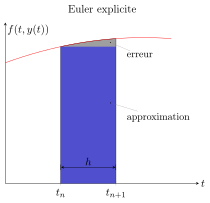

In [12]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
SVG(filename='rectangle_gauche.svg')

$$(2) \qquad \int_{t_n}^{t_{n+1}} f(t,y(t)) dt \simeq h\times f(t_n,y(t_n))$$

d'où le schéma itératif suivant:

\begin{align} y_{n+1} & = y_{n} + h\, f(t_n,y_n)  \\
y(0) & = y_0 
\end{align}

Graphiquement, on voit que cette méthode sous-estime (sur-estime) l'aire lorsque la fonction $f$ croît (décroît) au cours du temps.
L'erreur produite correspond à l'aire grisée, de forme quasi triangulaire et de surface $h\times ph$ où $p$ est la pente de $f$ à l'instant $t_n$. L'erreur de la méthode d'Euler explicite, liée à l'algorithme, vaut donc à peu près:

$$e_{E} \simeq \frac{1}{2} p h^2 $$

Après $N$ itérations, on commet une erreur globale de l'ordre de $N\frac{ph^2}{2} = \frac{1}{2} T p h$ où $T$ est la durée totale. On dit que la méthode d'Euler est d'ordre 1.

#### Méthode d'Euler implicite

On peut également approcher la valeur de l'intégrale $(1)$ par la méthode des rectangles à droite.

$$(3) \qquad \int_{t_n}^{t_{n+1}} f(t,y(t)) dt \simeq h\times f(t_{n+1},y(t_{n+1}))$$

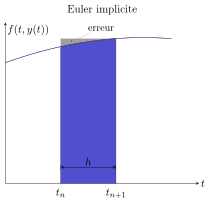

In [14]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
SVG(filename='rectangle_droite.svg')

avec le schéma itératif suivant:

\begin{align} 
y_{n+1} & = y_{n} + h\, f(t_{n+1},y_{n+1})  \\
y(0) & = y_0 
\end{align}

Le terme $y_{n+1}$ est présent dans le terme de gauche et celui de droite.
Contrairement à la méthode d'Euler explicite, la grandeur recherchée $y_{n+1}$ est reliée à une fonction qui dépend de cette même grandeur. Autrement dit, $y_{n+1}$ est défini *implicitement* d'où le nom de la méthode.

Cette méthode, comme on le voit graphiquement, produit une erreur opposée à celle de la méthode d'Euler explicite. Elle apporte une complication dansla résolution de l'équation $(3)$, car l'équation implicite doit être résolue à chaque étape ce qui demande l'emploi d'un algorithme annexe (dichotomie, algorithme de Newton, ...)


#### Algorithme pour la méthode d'Euler implicite

* Initialiser le pas $h$ et la durée $T$
* Initialiser les conditions initiales: $t=0$ et $y_0 = y(0)$
* Tant que $t \leq T$ faire:

    a. Calcul de $k_1 = f(t,y)$
    
    b. $y = y + h \times k_1$ et $t = t+h$
    
    c. Stocker le point

### Travail à réaliser sur la méthode d'Euler

a. Écrire une fonction `euler_explicit(f,y0,t)` qui pour une donnée initiale `y0` retourne les valeurs $y_0, y_1, \dots, y_N$ calculées avec la méthode d'Euler explicite aux temps $t_0,t_1, \dots, t_N$ représentés par le vecteur `t`.

b. Utiliser cette fonction pour résoudre une équation différentielle de votre choix, avec une condition initiale de votre choix. 
Si vous êtes en manque d'inspiration, vous pouvez vous attaquer à: $y'(t) = y(t)$ avec $y_0 = 1$ par exemple !

c. Essayez de mettre en évidence l'écart entre solution réelle et solution numérique de votre équation différentielle.

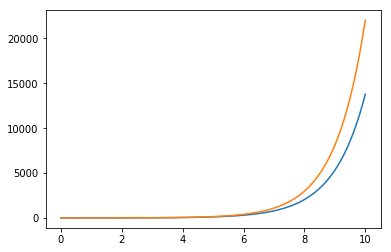

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def F(t,y):
    return y #résolution de l'éq diff y'= y soluce: y(t) = y0 exp(t) 

def euler_explicit(y0,t0,tn,n,F):
    #args temps courant, cond intiale, tinit, tfin, nbre pas, eq diff
    h = (tn-t0)/n #valeur du pas
    y = [y0] 
    t = [t0] 
    for i in range(n):
        t1 = t0 + h
        y1 = y0 + h * F(t0,y0)
        y.append(y1)
        t.append(t1)
        t0 = t1
        y0 = y1
    return t,y

t,y = euler_explicit(1,0,10,100,F)

#comparaison à la solution y = y0 exp(t)
tech = np.linspace(0,10,100)
yech = 1*np.exp(tech)

plt.plot(t,y)
plt.plot(tech,yech)

### 2. Méthode de Runge-Kutta